In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['listed_in'].value_counts().head(10)


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [8]:
df_clean = df[['title', 'type', 'listed_in', 'duration']]
df_clean.dropna(inplace=True)
df_clean.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_15232\2458592905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


,title,type,listed_in,duration
0,Dick Johnson Is Dead,Movie,Documentaries,90 min
1,Blood & Water,TV Show,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
2,Ganglands,TV Show,"Crime TV Shows, International TV Shows, TV Act...",1 Season
3,Jailbirds New Orleans,TV Show,"Docuseries, Reality TV",1 Season
4,Kota Factory,TV Show,"International TV Shows, Romantic TV Shows, TV ...",2 Seasons


In [12]:
# Convert 'duration' column to string before applying .str functions
df_clean['duration'] = df_clean['duration'].astype(str)

# Now filter rows that contain 'min' (usually for Movies)
df_clean = df_clean[df_clean['duration'].str.contains('min')]


In [13]:
df_clean['duration'] = df_clean['duration'].str.extract(r'(\d+)').astype(int)


In [14]:
df_clean['genre'] = df_clean['listed_in'].apply(lambda x: x.split(',')[0])
df_clean = df_clean[['title', 'genre', 'duration']]


In [15]:
df_encoded = pd.get_dummies(df_clean['genre'])

# Combine genre encoding with duration
features = pd.concat([df_encoded, df_clean['duration']], axis=1)


In [17]:
features.shape


(0, 1)

In [19]:
# Start clean, keep only needed columns again
df_clean = df[['title', 'listed_in', 'duration']].copy()

# Ensure all duration values are strings
df_clean['duration'] = df_clean['duration'].astype(str)

# Keep only rows with "min" (movies)
df_clean = df_clean[df_clean['duration'].str.contains('min')]

# Extract numeric duration
df_clean['duration'] = df_clean['duration'].str.extract(r'(\d+)').astype(int)

# Now you can safely extract genres
df_clean['genre'] = df_clean['listed_in'].apply(lambda x: x.split(',')[0])


In [20]:
# One-hot encode genre
genre_encoded = pd.get_dummies(df_clean['genre'])

# Combine one-hot genre with duration
features = pd.concat([genre_encoded, df_clean['duration']], axis=1)


In [21]:
print(df_clean.columns)         # Should include 'listed_in'
print(features.shape)           # Should be (non-zero, n)
features.head()                 # Preview final feature set


Index(['title', 'listed_in', 'duration', 'genre'], dtype='object')
(6128, 20)


,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers,duration
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,90
6,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,91
7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,125
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,104
12,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,127


In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster label to your original df_clean
df_clean['Cluster'] = clusters


In [27]:
df_clean['Cluster'].value_counts()



Cluster
0    3449
1    1161
4     859
3     605
2      54
Name: count, dtype: int64

In [28]:
df_clean.groupby('Cluster').head(3)


,title,listed_in,duration,genre,Cluster
0,Dick Johnson Is Dead,Documentaries,90,Documentaries,1
6,My Little Pony: A New Generation,Children & Family Movies,91,Children & Family Movies,3
7,Sankofa,"Dramas, Independent Movies, International Movies",125,Dramas,0
9,The Starling,"Comedies, Dramas",104,Comedies,0
12,Je Suis Karl,"Dramas, International Movies",127,Dramas,0
13,Confessions of an Invisible Girl,"Children & Family Movies, Comedies",91,Children & Family Movies,3
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Documentaries, International Movies",67,Documentaries,1
23,Go! Go! Cory Carson: Chrissy Takes the Wheel,Children & Family Movies,61,Children & Family Movies,3
36,The Stronghold,"Action & Adventure, Dramas, International Movies",105,Action & Adventure,4
38,Birth of the Dragon,"Action & Adventure, Dramas",96,Action & Adventure,4


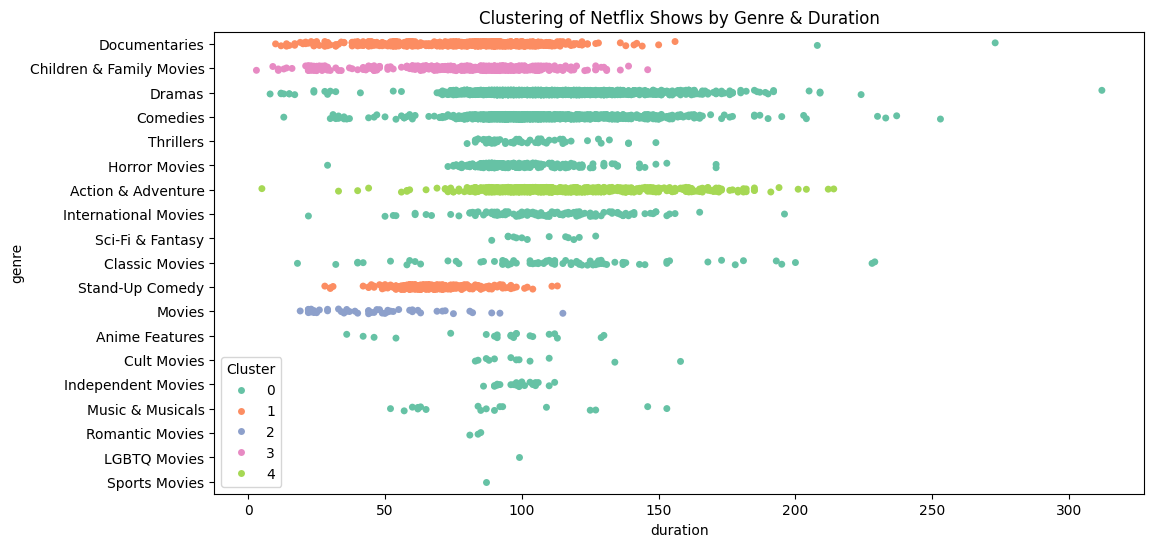

In [29]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df_clean, x='duration', y='genre', hue='Cluster', palette='Set2', jitter=True)
plt.title("Clustering of Netflix Shows by Genre & Duration")
plt.legend(title='Cluster')
plt.show()


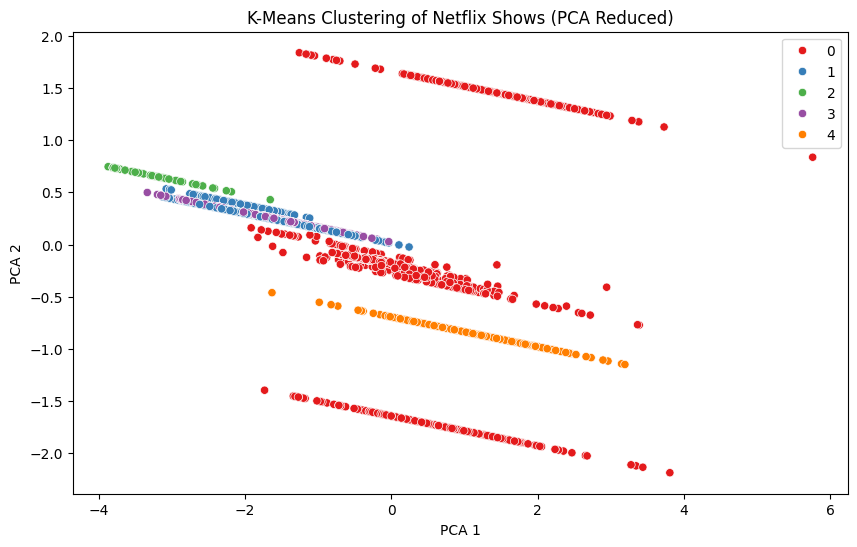

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

plt.figure(figsize=(10,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=clusters, palette='Set1')
plt.title("K-Means Clustering of Netflix Shows (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
